In [24]:
import pandas as pd
pd.set_option('display.max_rows', 20000)
# Base folder for the Instacart dataset
BASE_PATH = "C:\\Users\\Porfirio\\Desktop\\proj3\\comp541Proj\\"
#BASE_PATH = "drive/MyDrive/COMP 541/instacart-market-basket-analysis/"

# 1. Orders data
df_orders = pd.read_csv(f"{BASE_PATH}orders.csv")

# 2. Products data
df_products = pd.read_csv(f"{BASE_PATH}products.csv")

# 3. Departments data
df_departments = pd.read_csv(f"{BASE_PATH}departments.csv")

#4. Aisles
df_aisles = pd.read_csv(f"{BASE_PATH}aisles.csv")

#5. Order Products Train
df_order_products_train = pd.read_csv(f"{BASE_PATH}order_products__train.csv")

In [47]:
display(df_departments)
display(df_aisles)
display(df_products)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [36]:
# Drop conflicting columns before merging
df_order_products_train = df_order_products_train.drop(columns=['aisle_id', 'department_id', 'product_name'], errors='ignore')

# Merge df_order_products_train with df_products
df_order_products_train = df_order_products_train.merge(
	df_products, on='product_id', how='left', suffixes=('_train', '_products')
)
display(df_order_products_train.head())

# Merge products with aisle name and department name
df_products_info = df_products.merge(df_aisles, on='aisle_id', how='left')
df_products_info = df_products_info.merge(df_departments, on='department_id', how='left')
# Show aisles with the most products ordered
df_order_products = df_order_products_train.groupby('aisle_id').size().reset_index(name='count')
df_order_products = df_order_products.merge(df_aisles, on='aisle_id', how='left')
df_order_products = df_order_products.sort_values(by='count', ascending=False)
display(df_order_products.head(10))

,order_id,product_id,add_to_cart_order,reordered,product_name_x,aisle_id_x,department_id_x,product_name_y,aisle_id_y,department_id_y,product_name_train,aisle_id_train,department_id_train,product_name_products,aisle_id_products,department_id_products,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16,Bulgarian Yogurt,120,16,Bulgarian Yogurt,120,16,Bulgarian Yogurt,120,16,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4,Organic Celery Hearts,83,4,Organic Celery Hearts,83,4,Organic Celery Hearts,83,4,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4,Cucumber Kirby,83,4,Cucumber Kirby,83,4,Cucumber Kirby,83,4,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,Lightly Smoked Sardines in Olive Oil,95,15,Lightly Smoked Sardines in Olive Oil,95,15,Lightly Smoked Sardines in Olive Oil,95,15,Lightly Smoked Sardines in Olive Oil,95,15


,aisle_id,count,aisle
82,83,150609,fresh vegetables
23,24,150473,fresh fruits
122,123,78493,packaged vegetables fruits
119,120,55240,yogurt
20,21,41699,packaged cheese
114,115,36617,water seltzer sparkling water
83,84,32644,milk
106,107,31269,chips pretzels
90,91,26240,soy lactosefree
111,112,23635,bread


In [38]:
#Remove products that are from aisles_id  83, 24, and 123
df_order_products_train = df_order_products_train[~df_order_products_train['aisle_id'].isin([83, 24, 123])]
#Get all orders that have alcohol products
df_alcohol_orders = df_order_products_train[df_order_products_train['department_id'] == 5]['order_id'].unique()
display(df_alcohol_orders)

array([   1325,    2985,    3209, ..., 3419893, 3420729, 3420745],
      shape=(3105,))

In [57]:
#Get top products that are ordered with alcohol products
df_alcohol_products = df_order_products_train[df_order_products_train['order_id'].isin(df_alcohol_orders)]
df_alcohol_products = df_alcohol_products.groupby('product_id').size().reset_index(name='count')
df_alcohol_products = df_alcohol_products.merge(df_products, on='product_id', how='left')
df_alcohol_products = df_alcohol_products.sort_values(by='count', ascending=False)
display(df_alcohol_products.head(10))

#Get top products that are ordered with alcohol products and are not alcohol products
df_ordered_with__al_products_train = df_order_products_train[~df_order_products_train['product_id'].isin(df_alcohol_products['product_id'])]
df_ordered_with__al_products = df_ordered_with__al_products_train.groupby('product_id').size().reset_index(name='count')
df_ordered_with__al_products = df_ordered_with__al_products.merge(df_products, on='product_id', how='left')
df_ordered_with__al_products = df_ordered_with__al_products.sort_values(by='count', ascending=False)
display(df_ordered_with__al_products)

,product_id,count,product_name,aisle_id,department_id
350,2120,295,Sauvignon Blanc,62,5
5648,33065,237,Cabernet Sauvignon,28,5
7855,46088,224,Beer,27,5
6563,38444,193,Chardonnay,62,5
7706,45190,191,Vodka,124,5
7027,41131,157,India Pale Ale,27,5
2001,12013,139,Pinot Noir,28,5
192,1160,116,Pinot Grigio,62,5
4750,27885,91,Malbec,28,5
6473,37923,80,Prosecco Sparkling Wine,134,5


,product_id,count,product_name,aisle_id,department_id
21161,35951,2176,Organic Unsweetened Almond Milk,91,16
12978,22035,1993,Organic Whole String Cheese,21,16
10889,18465,1767,Organic Grade A Free Range Large Brown Eggs,86,16
23883,40604,1449,Feta Cheese Crumbles,21,16
2856,4799,1324,Shredded Parmesan,21,16
...,...,...,...,...,...
17502,29725,1,Source Toothbrush Soft,20,11
17509,29741,1,Mint Candy Bar,45,19
17517,29753,1,Spaghettio's plus Calcium,59,15
17593,29877,1,"MultiGrain & Seed Chips, Superfood, Sweet Pota...",107,19


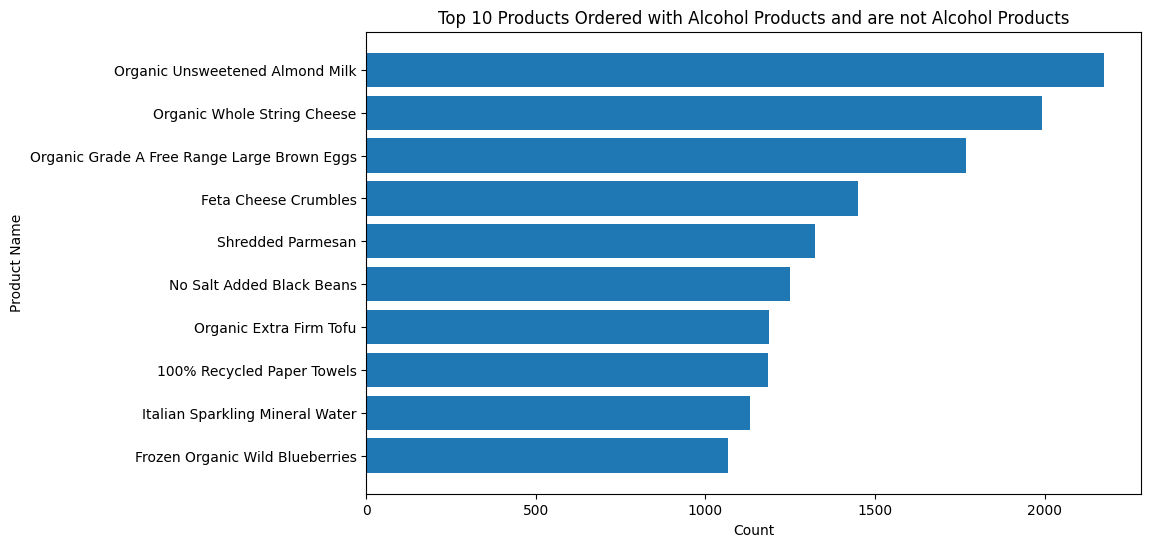

In [46]:
#Plotting the top 10 products ordered with alcohol products and are not alcohol products
import matplotlib.pyplot as plt

#plotting the top 10 products ordered with alcohol products and are not alcohol products
plt.figure(figsize=(10, 6))
plt.barh(df_ordered_with__al_products['product_name'][:10], df_ordered_with__al_products['count'][:10])
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.title('Top 10 Products Ordered with Alcohol Products and are not Alcohol Products')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()


In [58]:
import numpy as np
L = []
L = list(df_ordered_with__al_products_train.groupby("order_id")['product_id'].agg(list))
L[0]

[49302, 11109, 43633, 22035]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(L).transform(L)
df = pd.DataFrame(te_ary, columns=te.columns_)
df = df.sample(frac=0.9, random_state=1)  # Sample 0% of the data for faster processing

In [63]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
frequent_itemsets_fp = fpgrowth(df, min_support=.005, use_colnames=True)
frequent_itemsets_fp 

KeyboardInterrupt: 

,product_id,count,product_name,aisle_id,department_id
1167,9076,32,Blueberries,116,1
666,5077,25,100% Whole Wheat Bread,112,3
5383,43352,23,Raspberries,32,4
5550,44632,21,Sparkling Water Grapefruit,115,7
6151,49235,20,Organic Half & Half,53,16
2435,19348,20,Fat Free Milk,84,16
4140,33198,19,Sparkling Natural Mineral Water,115,7
1139,8859,18,Natural Spring Water,115,7
3475,27845,18,Organic Whole Milk,84,16
524,3957,18,100% Raw Coconut Water,31,7


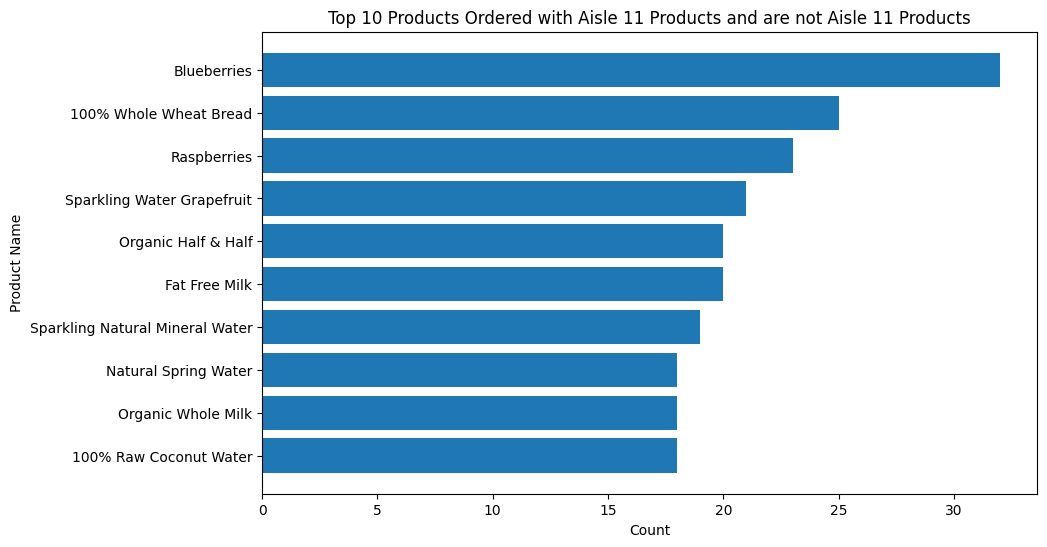

In [53]:
#Get all orders that have a products from aisle 11
df_aisle_11_orders = df_order_products_train[df_order_products_train['aisle_id'] == 11]['order_id'].unique()
#Show products that are ordered with aisle 11 products
df_aisle_11_products = df_order_products_train[df_order_products_train['order_id'].isin(df_aisle_11_orders)]
df_aisle_11_products = df_aisle_11_products.groupby('product_id').size().reset_index(name='count')
df_aisle_11_products = df_aisle_11_products.merge(df_products, on='product_id', how='left')
df_aisle_11_products = df_aisle_11_products.sort_values(by='count', ascending=False)
#Create df that has aisle 11 orders without aisle 11 products
df_aisle_11_products = df_aisle_11_products[~df_aisle_11_products['product_id'].isin(df_order_products_train[df_order_products_train['aisle_id'] == 11]['product_id'])]

#Show top 10 products that are ordered with aisle 11 products and are not aisle 11 products
display(df_aisle_11_products.head(10))

#Plotting the top 10 products ordered with aisle 11 products and are not aisle 11 products
plt.figure(figsize=(10, 6))
plt.barh(df_aisle_11_products['product_name'][:10], df_aisle_11_products['count'][:10])
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.title('Top 10 Products Ordered with Aisle 11 Products and are not Aisle 11 Products')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top